In [1]:
import os
import numpy as np
import torch
import scipy
from radioNN.data.loader import AntennaDataset
from radioNN.data.transforms import sph2cart
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from radioNN.process_network import NetworkProcess
from radioNN.networks.antenna_fc_network import AntennaNetworkFC
from view_scalars import thin_or_not
from view_scalars import get_fluences0, get_fluences1, get_lateral_distance
from scipy import integrate
from tqdm.auto import tqdm

radio_data_path = "/home/denis/memmap_files/memmap"
input_data_file = os.path.join(radio_data_path, "input_data.npy")
input_meta_file = os.path.join(radio_data_path, "meta_data.npy")
antenna_pos_file = os.path.join(radio_data_path, "antenna_pos_data.npy")
output_meta_file = os.path.join(radio_data_path, "output_meta_data.npy")
#output_file = os.path.join(radio_data_path, "output_gece_data.npy")
output_file = os.path.join(radio_data_path, "output_vBvvB_data.npy")
dataset = AntennaDataset(
    input_data_file,
    input_meta_file,
    antenna_pos_file,
    output_meta_file,
    output_file,
    mmap_mode='r',
    one_shower=33,
    # return_fluence=False,
    # percentage=0.01,
)
process = NetworkProcess(
    model_class=AntennaNetworkFC,
    # one_shower=one_shower,
    percentage=100,
    batch_size=8,
    wb=False,
)
process.output_channels = 3
model_name = "2506Jun11Wed_024718" 

process.model = AntennaNetworkFC(3)
state_checkpoint = torch.load(
    f"/home/denis/radio_nn/runs/{model_name}/SavedState",
)
process.model.load_state_dict(state_checkpoint['model_state_dict'])
process.model.eval()

/home/denis/miniconda3/envs/RadioNNLofar/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using the data from /home/denis/memmap_files/memmap in cpu with memmap mode: r using 100% of data
Total showers after filter 23927


100%|██████████| 23927/23927 [01:03<00:00, 376.34it/s] 


3
Using <class 'radioNN.networks.antenna_fc_network.AntennaNetworkFC'>


AntennaNetworkFC(
  (fc_layers_encode): Sequential(
    (0): Linear(in_features=11, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=128, out_features=512, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=512, out_features=512, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
  )
  (fc_meta): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_feature

In [2]:

#result_dict = {}
#
#with open("/home/denis/memmap_files/log/SIM_log.txt", "r") as f:
#    for idx, line in enumerate(f, start=1):
#        try:
#            file_path = line.strip().split("File: ")[-1]
#            result_dict[str(idx)] = file_path  # <-- keep full path
#        except IndexError:
#            print(f"Failed to parse line {idx}: {line}")
#
## Optional: save as JSON
#import json
#with open("Index_vs_SIM.json", "w") as f:
#    json.dump(result_dict, f, indent=2)


In [3]:
trained_indices = np.unique(np.array(state_checkpoint['indices'])//160)
#print(np.unique(np.array(state_checkpoint['indices'])//160))
#print(len(np.unique(np.array(state_checkpoint['indices'])//160)))

import json
with open("/home/denis/radio_nn/Index_vs_SIM.json", "r") as f:
    all_indices_vs_SIM = json.load(f)

#print(all_indices_vs_SIM)

with open("/home/denis/radio_nn/untrained_indices_vs_SIM.json", "r") as f:
    untrained_indices_vs_SIM = json.load(f)

with open("/home/denis/radio_nn/position_lookup.json", "r") as f:
    position_dict = json.load(f)



print(position_dict) 

print(untrained_indices_vs_SIM)
#print(os.path.basename(untrained_indices_vs_SIM['2']))

{'Item2': 'Item1', '0': 'pos_100_0', '1': 'pos_100_135', '2': 'pos_100_180', '3': 'pos_100_225', '4': 'pos_100_270', '5': 'pos_100_315', '6': 'pos_100_45', '7': 'pos_100_90', '8': 'pos_125_0', '9': 'pos_125_135', '10': 'pos_125_180', '11': 'pos_125_225', '12': 'pos_125_270', '13': 'pos_125_315', '14': 'pos_125_45', '15': 'pos_125_90', '16': 'pos_150_0', '17': 'pos_150_135', '18': 'pos_150_180', '19': 'pos_150_225', '20': 'pos_150_270', '21': 'pos_150_315', '22': 'pos_150_45', '23': 'pos_150_90', '24': 'pos_175_0', '25': 'pos_175_135', '26': 'pos_175_180', '27': 'pos_175_225', '28': 'pos_175_270', '29': 'pos_175_315', '30': 'pos_175_45', '31': 'pos_175_90', '32': 'pos_200_0', '33': 'pos_200_135', '34': 'pos_200_180', '35': 'pos_200_225', '36': 'pos_200_270', '37': 'pos_200_315', '38': 'pos_200_45', '39': 'pos_200_90', '40': 'pos_225_0', '41': 'pos_225_135', '42': 'pos_225_180', '43': 'pos_225_225', '44': 'pos_225_270', '45': 'pos_225_315', '46': 'pos_225_45', '47': 'pos_225_90', '48': '

In [4]:
#import csv
#
#def load_csv_to_dict(csv_path):
#    result = {}
#    with open(csv_path, newline='') as csvfile:
#        reader = csv.DictReader(csvfile)
#        for row in reader:
#            # Flip Item2 and Item1: key = index (as string), value = path
#            result[str(row["Item2"])] = row["Item1"]
#    return result
#
## Load both files
#dict1 = load_csv_to_dict("/home/denis/memmap_files/csv/Iron_SIM_vs_Index.csv")
#dict2 = load_csv_to_dict("/home/denis/memmap_files/csv/Proton_SIM_vs_Index.csv")
#
## Optionally merge both into one dictionary
#merged_dict = {**dict1, **dict2}
#
## Save to JSON if you want
#import json
#with open("Index_vs_SIM.json", "w") as f:
#    json.dump(merged_dict, f, indent=2)
#
## Example access
#print(merged_dict["22"])  # → /home/.../SIM000001.hdf5


In [5]:
#import numpy as np
#import json
#
## Load the dictionary from file
#with open("/home/denis/radio_nn/Index_vs_SIM.json", "r") as f:
#    all_indices_vs_SIM = json.load(f)
#
## Convert trained indices (from state_checkpoint) to set of strings
#trained_indices = np.unique(np.array(state_checkpoint['indices']) // 160)
#trained_indices_str = set(str(i) for i in trained_indices)
#
## Filter the original dictionary
#untrained_dict = {
#    key: value for key, value in all_indices_vs_SIM.items()
#    if key not in trained_indices_str
#}
#
## Optionally save it
#with open("untrained_indices_vs_SIM.json", "w") as f:
#    json.dump(untrained_dict, f, indent=2)


In [6]:
fnt_size = 16
def plot_antenna_pulse2(antenna_number, outp_data1, outp_data2,outm_data):
    assert 1 <= antenna_number <= 160
    assert outm_data[antenna_number - 1, 0] == outm_data[antenna_number -1, 1]
    steps = outm_data[antenna_number -1, 0] + np.arange(0, 256)
    fig, ax = plt.subplot_mosaic("AB", figsize=[int(fnt_size), fnt_size/3.33])
    ax["A"].plot(steps, outp_data1[antenna_number-1, :, 0], label='NN')
    ax["A"].plot(steps, outp_data2[antenna_number-1, :, 0], label='CoREAS')
    ax["A"].set_title(f"Geomagnetic Effect for Antenna {antenna_number}")
    ax["B"].plot(steps, outp_data1[antenna_number-1, :, 1], label='NN')
    ax["B"].plot(steps, outp_data2[antenna_number-1, :, 1], label='CoREAS')
    ax["B"].set_title(f"Charge Excess for Antenna {antenna_number}")
    ax["A"].set_xlabel("t (ns)");    ax["B"].set_xlabel("t (ns)")
    ax["A"].set_ylabel("E (V/m)");    ax["B"].set_ylabel("E (V/m)")
    ax["A"].legend();     ax["B"].legend()
    fig.tight_layout()
    return fig


/home/denis/radio_nn/radioNN/data/transforms.py:53: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /home/builder/cbouss/pytorch/croot/pytorch_1685629640362/work/aten/src/ATen/native/TensorShape.cpp:3277.)
  meta_data.T[2] /= 700


torch.Size([160, 256, 3])


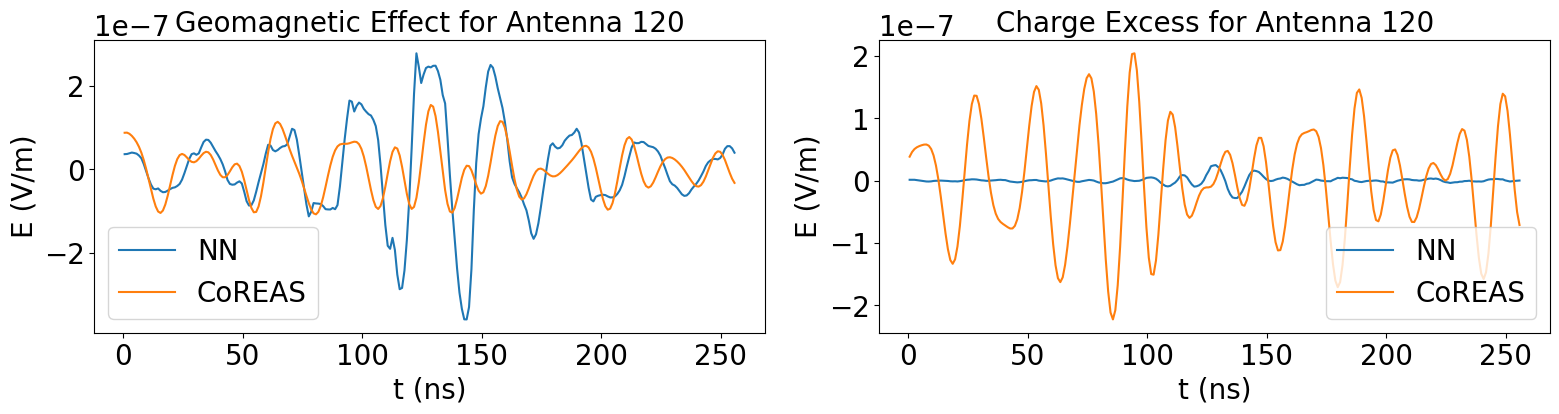

In [7]:
(inp_data_real, inp_meta_real, antenna_pos_real, outp_meta_real, outp_data_real) = dataset.data_of_single_shower(2)
(outp_meta_sim, outp_data_sim,_) = process.pred_one_shower(2)

print(outp_data_sim.shape)
#sim_traces_array = []
#for i in range(0,160,1):
    

plot_antenna_pulse2(120, outp_data_sim, outp_data_real, outp_meta_real);

In [8]:
import shutil
import h5py
from radiotools import helper as rdhelp
from radiotools import coordinatesystems
import units

def get_angles(corsika, declination):
    """
    Converting angles in corsika coordinates to local coordinates.

    Corsika positive x-axis points to the magnetic north, NRR coordinates positive x-axis points to the geographic east.
    Corsika positive y-axis points to the west, NRR coordinates positive y-axis points to the geographic north.
    Corsika z-axis points upwards, NuRadio z-axis points upwards.

    Corsika's zenith angle of a particle trajectory is defined between the particle momentum vector and the negative
    z-axis, meaning that the particle is described in the direction where it is going to. The azimuthal angle is
    described between the positive x-axis and the horizontal component of the particle momentum vector
    (i.e. with respect to the magnetic north) proceeding counterclockwise.

    NRR describes the particle zenith and azimuthal angle in the direction where the particle is coming from.
    Therefore, the zenith angle is the same, but the azimuthal angle has to be shifted by 180 + 90 degrees.
    The north has to be shifted by 90 degrees plus difference between geomagnetic and magnetic north.

    Parameters
    ----------
    corsika : hdf5 file object
        the open hdf5 file object of the corsika hdf5 file
    declination : float
        declination of the magnetic field, in internal units

    Returns
    -------
    zenith : float
        zenith angle
    azimuth : float
        azimuth angle
    magnetic_field_vector : np.ndarray
        magnetic field vector

    Examples
    --------
    The declinations can be obtained using the functions in the radiotools helper package, if you
    have the magnetic field for the site you are interested in.

    >>> magnet = hp.get_magnetic_field_vector('mooresbay')
    >>> dec = hp.get_declination(magnet)
    >>> evt = h5py.File('NuRadioReco/examples/example_data/example_data.hdf5', 'r')
    >>> get_angles(corsika, dec)[2] / units.gauss
    array([ 0.05646405, -0.08733734,  0.614     ])
    >>> magnet
    array([ 0.058457, -0.09042 ,  0.61439 ])
    """
    zenith = corsika['inputs'].attrs["THETAP"][0] * units.deg
    azimuth = rdhelp.get_normalized_angle(
        3 * np.pi / 2. + np.deg2rad(corsika['inputs'].attrs["PHIP"][0]) + declination / units.rad
    ) * units.rad

    # in CORSIKA convention, the first component points North (y in NRR) and the second component points down (minus z)
    By, minBz = corsika['inputs'].attrs["MAGNET"]
    B_inclination = np.arctan2(minBz, By)  # angle from y-axis towards negative z-axis

    B_strength = np.sqrt(By ** 2 + minBz ** 2) * units.micro * units.tesla

    # zenith of the magnetic field vector is 90 deg + inclination, as inclination proceeds downwards from horizontal
    # azimuth of the magnetic field vector is 90 deg - declination, as declination proceeds clockwise from North
    magnetic_field_vector = B_strength * rdhelp.spherical_to_cartesian(
        np.pi / 2 + B_inclination, np.pi / 2 - declination / units.rad
    )

    return zenith, azimuth, magnetic_field_vector

def get_geomagnetic_angle(zenith, azimuth, magnetic_field_vector):
    """
    Calculates the angle between the geomagnetic field and the shower axis defined by `zenith` and `azimuth`.

    Parameters
    ----------
    zenith : float
        zenith angle (in internal units)
    azimuth : float
        azimuth angle (in internal units)
    magnetic_field_vector : np.ndarray
        The magnetic field vector in the NRR coordinate system (x points East, y points North, z points up)

    Returns
    -------
    geomagnetic_angle : float
        geomagnetic angle
    """
    shower_axis_vector = rdhelp.spherical_to_cartesian(zenith / units.rad, azimuth / units.rad)
    geomagnetic_angle = rdhelp.get_angle(magnetic_field_vector, shower_axis_vector) * units.rad

    return geomagnetic_angle



import os
import shutil
import h5py
import numpy as np

def Copy_and_change_HDF5(Sim_number, untrained_indices_vs_SIM, position_dict):

    sim_path = untrained_indices_vs_SIM[f'{Sim_number}']

    split_token = "hdf5_sims" + os.sep
    relative_path = sim_path.split(split_token)[-1]

    relative_dir, filename = os.path.split(relative_path)

    base_dir = "/home/denis/radio_nn/HDF5_vs_PREDICTED"
    original_dir = os.path.join(base_dir, "original", relative_dir)
    predicted_dir = os.path.join(base_dir, "predicted", relative_dir)

    os.makedirs(original_dir, exist_ok=True)
    os.makedirs(predicted_dir, exist_ok=True)

    # Copy original file into both folders
    original_full_path = os.path.join('/home/denis/coreas_test_sims', relative_path)
    shutil.copy2(original_full_path, os.path.join(original_dir, filename))
    shutil.copy2(original_full_path, os.path.join(predicted_dir, filename))
    
    pred_path = os.path.join(predicted_dir, filename)
    conversion_fieldstrength_cgs_to_SI = 2.99792458e4
    
    f_h5 = h5py.File(pred_path, "r+")

    (inp_data_real, inp_meta_real, antenna_pos_real, outp_meta_real, outp_data_real) = dataset.data_of_single_shower(Sim_number)
    (outp_meta_sim, outp_data_sim, _) = process.pred_one_shower(Sim_number)

    f_h5_inputs = f_h5["inputs"]
    f_h5_hl = f_h5["highlevel"]
    f_h5_obsplane = f_h5_hl["obsplane_na_na_vB_vvB"]
    Bx, Bz = f_h5_inputs.attrs["MAGNET"]

    B_inclination = np.arctan2(Bz, Bx)
    B_declination = 0
    B_strength = (Bx**2 + Bz**2) ** 0.5

    zenith, azimuth, magnetic_field_vector = get_angles(f_h5, 0)
    ctrans = coordinatesystems.cstrafo(
        zenith, azimuth, magnetic_field_vector=magnetic_field_vector
    )
    geomagnetic_angle = get_geomagnetic_angle(zenith, azimuth, magnetic_field_vector)

    data = outp_data_sim.numpy()

    for i in range(160):
        # Swap and transform axes
        data[i][:, 0], data[i][:, 1] = data[i][:, 1], -data[i][:, 0]

        # Convert to SI
        data[i][:, 0:3] /= conversion_fieldstrength_cgs_to_SI
        data[i][:, 0:3] = ctrans.transform_from_vxB_vxvxB(data[i][:, 0:3])

        ant_pos = position_dict[f'{i}']
        new_data = np.zeros((data[i].shape[0], 4), dtype=data[i].dtype)
        new_data[:, 0] = f_h5_obsplane["times_filtered"][i]
        new_data[:, 1:4] = data[i][:, 0:3]

        # Delete and replace dataset
        try:
            del f_h5['CoREAS']['observers'][ant_pos]
        except KeyError:
            pass

        f_h5['CoREAS']['observers'].create_dataset(
            ant_pos, data=new_data
        )

    # Set time resolution attribute
    print(f_h5_obsplane.attrs["frequency_resolution"])
    print(f_h5_obsplane.attrs["frequency_low"])
    print(f_h5_obsplane.attrs["frequency_high"])
    f_h5['CoREAS'].attrs['TimeResolution'] = (f_h5_obsplane["times_filtered"][0][1]-f_h5_obsplane["times_filtered"][0][0])
    print(f'{((1 / f_h5_obsplane.attrs["frequency_resolution"])):.3e}')
    
    f_h5.flush()
    f_h5.close()


In [9]:
Sim_number = 2
Copy_and_change_HDF5(Sim_number,untrained_indices_vs_SIM,position_dict)

76293.9453125
30000000.0
80000000.0
1.311e-05
